## Persiapan Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('processed_gojek_reviews.csv')

# Handle missing values by dropping rows with NaN in 'processed_content'
df.dropna(subset=['processed_content'], inplace=True)

# Pisahkan fitur (processed_content) dan target (sentiment)
X = df['processed_content']
y = df['sentiment']

# Split data menjadi training dan testing set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Engineering dengan TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000)

df = df.dropna(subset=['processed_content'])

# Fit dan transform data training
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform data testing
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Model Klasifikasi dengan Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Train model
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

## Evaluasi Model

Accuracy: 0.8645
Precision: 0.8427
Recall: 0.8645
F1-Score: 0.8502

Classification Report:
              precision    recall  f1-score   support

     negatif       0.71      0.85      0.78     10797
      netral       0.11      0.01      0.02      1923
     positif       0.93      0.92      0.93     32051

    accuracy                           0.86     44771
   macro avg       0.59      0.59      0.57     44771
weighted avg       0.84      0.86      0.85     44771



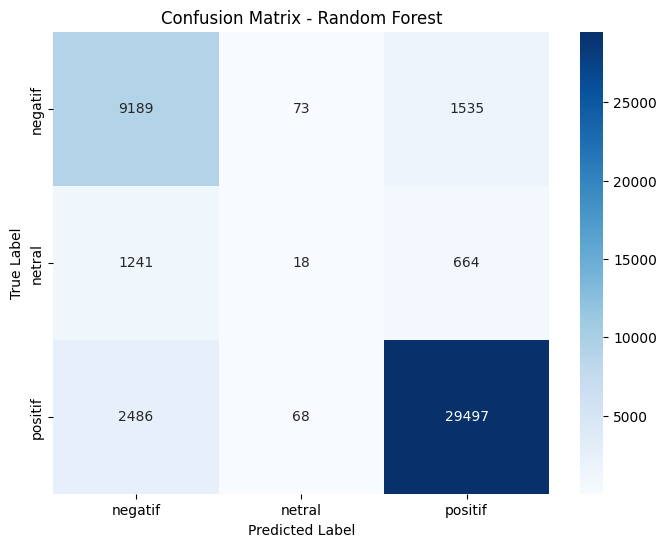


Classification Report for Cross-Validation:
              precision    recall  f1-score   support

     negatif       0.71      0.85      0.77     43219
      netral       0.12      0.01      0.02      7479
     positif       0.93      0.92      0.92    128384

    accuracy                           0.86    179082
   macro avg       0.59      0.59      0.57    179082
weighted avg       0.84      0.86      0.85    179082


--- Overall Cross-Validation Results ---
Average Accuracy: 0.8637 (+/- 0.0013)
Average Precision: 0.8433 (+/- 0.0015)
Average Recall: 0.8637 (+/- 0.0013)
Average F1: 0.8501 (+/- 0.0012)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold

# Prediksi pada data test
y_pred = rf_classifier.predict(X_test_tfidf)

# Hitung metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=rf_classifier.classes_))

# Confusion Matrix untuk test set
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_classifier.classes_,
            yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Cross-validation (5-fold) dengan confusion matrix
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(rf_classifier, X_train_tfidf, y_train, cv=skf)


# Print classification report untuk cross-validation
print("\nClassification Report for Cross-Validation:")
print(classification_report(y_train, y_pred_cv, target_names=rf_classifier.classes_))

# Cross-validation scores
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted'
}

print("\n--- Overall Cross-Validation Results ---")

for metric_name, scoring in scoring_metrics.items():
    scores = cross_val_score(rf_classifier, X_train_tfidf, y_train, cv=skf, scoring=scoring)
    mean_score = scores.mean()
    std_score = scores.std()
    print(f"Average {metric_name.capitalize()}: {mean_score:.4f} (+/- {std_score:.4f})")

# print(f"Average {'F1-Score' if metric_name == 'f1' else metric_name.capitalize()}: {mean_score:.4f} (+/- {std_score:.4f})")

## Menyimpan Model dan TF-IDF Vectorizer

In [ ]:
import joblib
import datetime

# Membuat nama file dengan timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f'rf_sentiment_model_{timestamp}.pkl'
vectorizer_filename = f'tfidf_vectorizer_{timestamp}.pkl'

# Simpan model dan vectorizer
joblib.dump(rf_classifier, model_filename, compress=3)
joblib.dump(tfidf_vectorizer, vectorizer_filename)

print(f"Model saved as {model_filename}")
print(f"TF-IDF Vectorizer saved as {vectorizer_filename}")

Model saved as rf_sentiment_model_20250605_122832.pkl
TF-IDF Vectorizer saved as tfidf_vectorizer_20250605_122832.pkl
